In [1]:
from utils import load_data, check_gpu, check_dir

import pandas as pd
import numpy as np
from tqdm import tqdm
import gc
from utils import meta_encoding
from functools import partial
import matplotlib.pyplot as plt
from scipy.stats import rankdata
import datetime
import lightgbm as lgb
pd.options.display.max_colwidth = 1000
pd.options.display.max_columns = 1000

%matplotlib inline
%load_ext autoreload
%autoreload 2
def fprint(df, name):
    print(f'{name} shape: ({df.shape[0]:,}, {df.shape[1]})')
import pprint
pp = pprint.PrettyPrinter(indent=1)

In [2]:
train_raw = load_data('train', nrows=5000000)
train_raw['timestamp'] = train_raw['timestamp'].apply(lambda ts: datetime.datetime.utcfromtimestamp(ts))


[20|12:40:35|utils              :114|load_data                |INFO] Loading train using 5,000,000 rows (4,999,976 trimmed) which is 31.38% out of total train data


In [3]:
train_ids = train_raw.session_id.unique()

In [4]:
# look at raw
rid = np.random.choice(train_ids, 1)[0]
rid

'0135295533a23'

### Check clean data

In [5]:
train_cleaned = pd.read_parquet('gbm_cache/preprocess_train_100000_no_test_added.snappy')

OSError: Passed non-file path: gbm_cache/preprocess_train_100000_no_test_added.snappy

In [ ]:
train_ids = train_cleaned.session_id.unique()

problems: 'b160c4dab0582'

In [ ]:
rid = np.random.choice(train_ids, 1)[0]
rid

In [ ]:
rid = 'b160c4dab0582'

In [ ]:
# raw
raw_demo = train_raw[train_raw.session_id==rid].copy()
raw_demo

In [ ]:
# clean
train_cleaned[train_cleaned.session_id==rid]

### Check feature generations

In [6]:
train_inputs = pd.read_parquet('./gbm_cache/train_inputs_5000000_no_test_added.snappy')
cf_cols = [c for c in train_inputs.columns if 'current_filters' in c]
drop_cols = cf_cols  # + ['country', 'platform']
# drop cf col for now
train_inputs.drop(drop_cols, axis=1, inplace=True)

In [ ]:
# # load model 
# clf = lgb.Booster(model_file='./models/lgb_cv0.model')

In [ ]:
train_ids = train_inputs.session_id.unique()

In [ ]:
rid = np.random.choice(train_ids, 1)[0]
rid

In [ ]:
raw_display_cols = ['session_id', 'timestamp', 'step', 'action_type', 'reference', 'platform', 'city', 'device', 
                    'current_filters', 'impressions', 'prices']

In [ ]:
raw_demo = train_raw[train_raw.session_id==rid].reset_index(drop=True)
click_mask = raw_demo.action_type=='clickout item'
answers = raw_demo.loc[click_mask, 'reference']
raw_demo.loc[click_mask, 'reference'] = '?'
raw_demo[raw_display_cols]

In [ ]:
answers

check input data with

In [ ]:
input_demo = train_inputs[train_inputs.session_id==rid].reset_index(drop=True)
input_demo

In [ ]:
s = '44|65|30|47|43|33|41|102|95|112|6|62|40|78|30|66|66|123|61|33|68|89|177|44|49'
s = s.split('|')
s = [float(i) for i in s]
rankdata(s, method='dense'), rankdata(s, method='dense').max()

In [ ]:
train_inputs.sort_order.unique()

In [ ]:
pp.pprint(input_demo.to_dict())

In [ ]:
shap_values[0].shape

In [ ]:
ps = '220|193|310|265|162|119|99|43|51|83|96|65'.split('|')
ps = [float(i) for i in ps]
rankdata(ps, method='dense')

In [ ]:
np.nanmean(ps), np.nanmedian(ps), np.mean(ps), np.median(ps)

In [ ]:
1/12

In [ ]:
2/25

In [ ]:
meta_mapping = meta_encoding()

In [ ]:
# refs = raw_eg.impressions.dropna().str.split('|')
# refs = list([int(j) for i in refs for j in i])
refs = '20720|20814|83606|20772|20752|45909|9844958|20861|20681|45379|2085654|20785|152418|20848|20736|20750|20949|20743|917187|20745|20677|905283|83339|20843|20819'
refs = refs.split('|')
refs = [int(i) for i in refs]

In [ ]:
refs_meta = meta_mapping[meta_mapping.item_id.isin(refs)]
s = refs_meta.sum(axis=0)
refs_meta_useful = refs_meta[s[s!=0].index].reset_index(drop=True)
ss = refs_meta_useful.sum(axis=0)
refs_meta_useful = refs_meta_useful[ss[ss!=24].index]
refs_meta_useful = refs_meta_useful.set_index('item_id')
refs_meta_useful = refs_meta_useful.reindex(refs)
# cols = ['1 star', '2 star', '3 star', '4 star', '5 star', 
#                   'excellent rating', 'very good rating', 'good rating', 'satisfactory rating']
# refs_meta_useful[[c for c in cols if c in refs_meta_useful.columns]].loc[refs]
refs_meta_useful

In [ ]:
(6*4+3*2+2+1)/12, (1+4+4+1+3+2+0+0+2+3+3)/12

### check the meta properties

In [ ]:
meta_mapping = meta_encoding()

In [ ]:
# refs = raw_eg.impressions.dropna().str.split('|')
# refs = list([int(j) for i in refs for j in i])
refs = '14910|52419|53438|15918|15402|128443|772473|626051|158537|1193842|14824|5179324'
refs = refs.split('|')
refs = [int(i) for i in refs]

In [ ]:
refs_meta = meta_mapping[meta_mapping.item_id.isin(refs)]
s = refs_meta.sum(axis=0)
refs_meta_useful = refs_meta[s[s!=0].index].reset_index(drop=True)
ss = refs_meta_useful.sum(axis=0)
refs_meta_useful = refs_meta_useful[ss[ss!=24].index]
refs_meta_useful = refs_meta_useful.set_index('item_id')
refs_meta_useful = refs_meta_useful.reindex(refs)
refs_meta_useful

In [ ]:
cols_sum = refs_meta_useful.sum(axis=0)
one_cols = cols_sum[cols_sum==1].index
refs_meta_useful[one_cols]

In [ ]:
meta_mapping[meta_mapping.item_id==110702]

In [ ]:
m = pd.read_csv('./data/item_metadata.csv')

In [ ]:
m[m.item_id==110702]

In [ ]:
meta_mapping.columns.values

In [ ]:
meta_mapping[['1 star', '2 star', '3 star', 'from 3 stars', '4 star', 'from 4 stars', '5 star']]

In [ ]:
meta_mapping[['satisfactory rating', 'good rating', 'very good rating', 'excellent rating']]

In [ ]:
meta_mapping.head()

In [ ]:
(meta_mapping.loc[meta_mapping['good rating']==1, 'satisfactory rating']==0).sum()

In [ ]:
81/187

In [ ]:
1/25

In [ ]:
s = '81|120|81|187|70|45|56|130|124|56|58|77|52|40|120|53|65|65|54|30|59|33|45|108|37'
s = s.split('|')
s = [int(i) for i in s]
from scipy.stats import rankdata
rankdata(s, method='dense')

In [ ]:
17/20

In [ ]:
# input_demo = train_inputs[train_inputs.session_id==rid].reset_index(drop=True)
# input_demo

In [ ]:
# pp.pprint(input_demo.to_dict(orient='list'))

In [ ]:
from create_model_inputs import change_sort_order_mapping
change_sort_order_mapping()

### look at feature distribution

In [72]:
def check_distribution(rcol, bins=100, density=True, log=False, each_class=True):
    if each_class:
        demo = train_inputs[[rcol, 'target']]
        grps = demo.groupby('target')
        plt.clf()
        cm = plt.get_cmap('gist_rainbow')
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
        for k, grp in grps:
            _ = grp[rcol].hist(density=density, bins=bins, alpha=0.3, figsize=(20,10), label=f'{k}', ax=ax)
        plt.suptitle(f'{rcol} histgram')
        _ = plt.legend()
    else:
        ax = train_inputs[rcol].hist(density=density, bins=bins)
        plt.suptitle(f'{rcol} histgram')
    if log:
        ax.set_yscale('log')

In [8]:
columns = train_inputs.columns.values

In [79]:
columns

array(['session_id', 'step', 'device', 'fs', 'sort_order', 'imp_changed',
       'session_size', 'session_duration', 'last_duration',
       'last_action_type', 'last_reference_relative_loc', 'mean_rating',
       'median_rating', 'mean_star', 'median_star', 'n_imps', 'target',
       'mean_price', 'median_price', 'prices_0', 'prices_1', 'prices_2',
       'prices_3', 'prices_4', 'prices_5', 'prices_6', 'prices_7',
       'prices_8', 'prices_9', 'prices_10', 'prices_11', 'prices_12',
       'prices_13', 'prices_14', 'prices_15', 'prices_16', 'prices_17',
       'prices_18', 'prices_19', 'prices_20', 'prices_21', 'prices_22',
       'prices_23', 'prices_24', 'prices_rank_0', 'prices_rank_1',
       'prices_rank_2', 'prices_rank_3', 'prices_rank_4', 'prices_rank_5',
       'prices_rank_6', 'prices_rank_7', 'prices_rank_8', 'prices_rank_9',
       'prices_rank_10', 'prices_rank_11', 'prices_rank_12',
       'prices_rank_13', 'prices_rank_14', 'prices_rank_15',
       'prices_rank_16', 'pr

In [12]:
# nan_cols = train_inputs.isna().sum()
# nan_cols[nan_cols>0]#.plot.bar()

In [99]:
rcol = np.random.choice(columns, 1)[0] 
rcol = 'n_imps'
rcol

'n_imps'

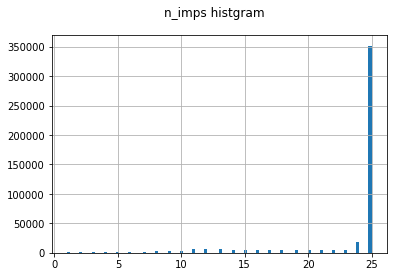

In [100]:
check_distribution(rcol, bins=100, log=False, density=False, each_class=False)

<Figure size 432x288 with 0 Axes>

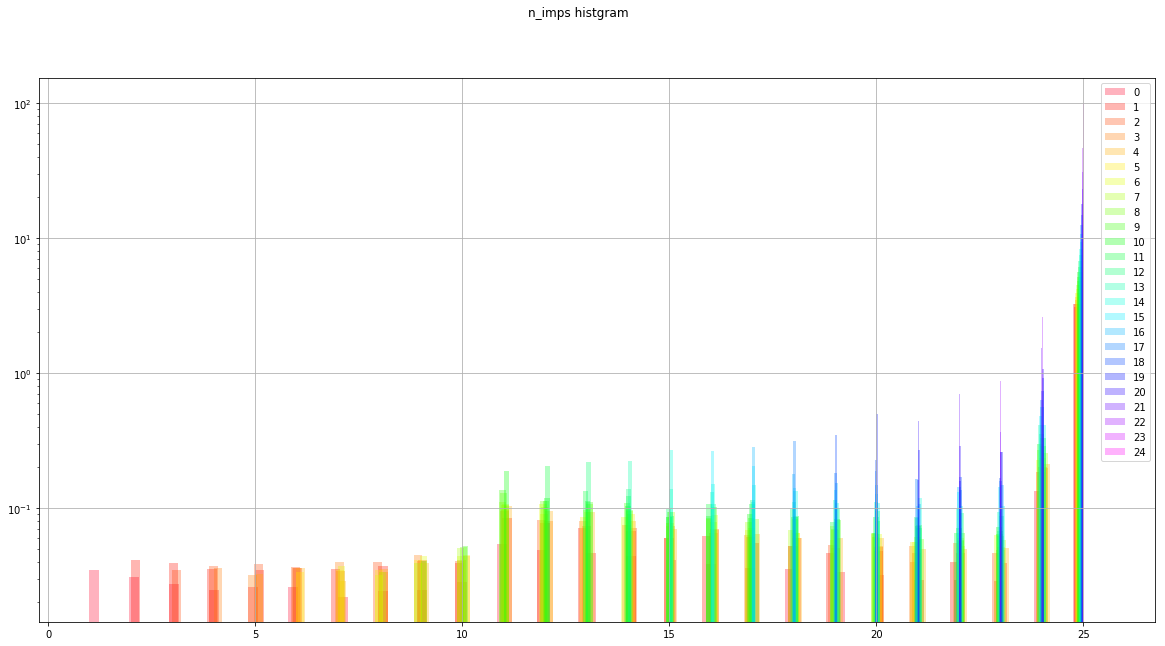

In [101]:
check_distribution(rcol, bins=100, log=True, density=True, each_class=True)

In [89]:
# train_inputs[rcol].hist(density=True, bins=50)

### country related

In [ ]:
cp = load_data('train', usecols=['city', 'platform'])

In [ ]:
cp['country'] = cp['city'].str.split(', ').str[-1]
cp['country'] = cp['country'].str.lower()

In [ ]:
countries = cp['country'].unique()

In [ ]:
platforms = cp['platform'].unique()

In [ ]:
country2code = np.load('data/country2code.npy').item()

In [ ]:
code2country = np.load('data/code2country.npy').item()

In [ ]:
set(countries) - set(list(country2code.keys()))

In [ ]:
set(list(country2code.keys())) - set(countries)

In [ ]:
fix_dict = {'bermudas': 'bermuda', 
            'bes islands': None,
            'brunei':'brunei darussalam',
            'china': "people's republic of china",
            'crimea': None,
            'curacao': 'netherlands antilles',
            'democratic republic of congo': 'congo, the democratic republic of',
            'east timor': 'timor',
            'french antilles': None,
            'guinea-bissau': None,
            'iran': 'iran, islamic republic of',
            'ivory coast': "côte d'ivoire",
            'kosovo': None,
            'laos': "lao people's democratic republic"
           }

In [ ]:
train_raw.impressions.notna()[train_raw.impressions.notna()].index[0]

In [ ]:
a = pd.read_parquet('./gbm_cache/preprocess_train_5000000_test_added.snappy')

In [ ]:
a.reference.head()

In [ ]:
a.reference.isna().sum()

In [ ]:
a[a.reference.isna()]

In [ ]:
b = pd.read_csv('./data/test.csv')

In [ ]:
b[b.session_id=='2a181b2125efe']

In [ ]:
import datetime
b['timestamp'] = b['timestamp'].apply(lambda ts: datetime.datetime.utcfromtimestamp(ts))


In [ ]:
b.timestamp

In [ ]:
a = pd.DataFrame({'A': np.random.randint(0, 3 ,10), 'B': np.random.randint(0, 5 ,10)})
a.loc[np.random.choice(a.index, 3), 'B'] = np.nan
a

In [ ]:
c = a.groupby('A')['B'].apply(list).reset_index()
c

In [ ]:
c.reset_index().B.values.tolist()

In [ ]:
m = {0: 'E', 1: 'Q'}
a.A.map(m)